# CartPole Environment

The CartPole environment is a classic OpenAI gym environment that can be used to test the efficacy of an RL agent in a MDP environment with a continuous observation space (state space). 

In brief, the environment consists of a pole attached by an un-acuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart, with the former resulting in the cart moving right, and the latter resulting in the cart moving left. The pendulum starts upright on the cart, and the goal of the RL agent is to prevent it from falling over by playing a balancing act with the left and right forces it exerts on the cart. 

## CartPole Environment Details

The details about the CartPole environment's observation space, action space, and reward signals are provided in the OpenAI gym documentation (https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py) as follows:

    
### Observation Space

The observation space consists of 4 variables, each being constrained by their own set of (min, max) values as provided in the table below:

| Num | Observation   | Min | Max|
|------|------|------|------|
|   0  |    Cart Position |   -4.8   |  4.8   |
|   1  |   Cart Velocity  |   -Infinity   |  Infinity   |
|   2  |   Pole Angle  |   -24 degrees   |   24 degrees  |
|   3  |   Pole Velocity at Tip  |    -Infinity   |  Infinity     |

As can be seen from the table, the observation space variables consists of continuous values, i.e. it would be virtually impossible to create a lookup table of state-value or action-value pairs over this space. As such, a function approximator, such as a neural network, will have to be used by the RL agent to approximate value functions so that the optimal policy can be found.
        
### Action Space

The action space consists of 2 discrete variables. The integer symbols and their corresponding actions are provided as follows:

- 0: 	Push cart to the left
- 1:	Push cart to the right
        
Note: The amount the velocity that is reduced or increased is not fixed; it depends on the angle the pole is pointing. This is because the center of gravity of the pole increases the amount of energy needed to move the cart underneath it

### Reward Signals

There is a reward of +1 for every step taken, including the termination step. This means that the greater the amount of time-steps that the pole is kept upright by the agent, the greater the reward received.
    
### Starting State
All observations are assigned a uniform random value in [-0.05..0.05]
        
### Episode Termination

The episode terminates when: 

- Pole Angle is more than 12 degrees, i.e. pole is about to fall. (Failure state)
- Cart Position is more than 2.4, i.e. center of the cart reaches the edge of the display screen. (Failure state)
- Episode length is greater than 200, i.e. pole has been kept upright for longer than 200 time-steps. (Success state)

### Solved Requirements

This environment is considered solved when the average reward is greater than or equal to 195.0 over 100 consecutive trials. That is, the pole has been kept upright for 195 timesteps or longer for 100episodes in a row.

### Source

This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson [Example 3.4, page 86].

# Exploring the Environment

For each step our RL agent takes in the CartPole environment, we receive `observation`, `reward`, `done`, and `info` in return. 

- `observation` returns the cart position, cart velocity, pole angle, and pole velocity at the tip.

- `reward` returns the amount of reward achieved by the previous action, i.e. +1 if the pole remains upright. There is no negative reward since the episode will terminate if the pole falls.

- `done` indicates that the episode has been terminated because the pole angle is more than 12 degrees, the cart position is more than 2.4, or the number of time steps is greater than 200.

- `info` contains diagnostic information to help in debugging.

In a typical setup, we start with an initial set of observations from the environment - this denotes the starting point of our agent. Using information from the observations, the agent takes an initial step by performing an action (denoted as `env.step(action)` , where action is sampled from the `env.action_space`) and enters the "agent-environment" loop. That is, the action leads to a new observation and reward, which the agent then uses to choose its next action (assuming a non-random policy).

<img src="http://gym.openai.com/assets/docs/aeloop-138c89d44114492fd02822303e6b4b07213010bb14ca5856d2d49d6b62d88e53.svg"/>

In [1]:
import gym
import math
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# create cartpole environment
env = gym.make('CartPole-v1')

# number of actions
print(f"Number of actions: {env.action_space}")

# 10 random samples from action space
action_sample = [env.action_space.sample() for i in range(10)]
print(f"10 random samples from action space: {action_sample}")

print()
# number of states
print(f"Number of states: {env.observation_space}")
print(f"Max: {env.observation_space.high.round(2)}")
print(f"Min: {env.observation_space.low.round(2)}")

# 10 random samples from state space
obs_sample = env.observation_space.sample()
print(f"One random sample from observation space:\n {obs_sample}")

Number of actions: Discrete(2)
10 random samples from action space: [1, 1, 1, 1, 0, 1, 1, 1, 0, 0]

Number of states: Box(4,)
Max: [4.8   inf 0.42  inf]
Min: [-4.8   -inf -0.42  -inf]
One random sample from observation space:
 [ 4.2190156e+00  2.4108467e+38 -8.4720016e-02  9.3216798e+37]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in multiply
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in multiply


In [2]:
time_steps = []

# run sim
for episode in range(1):
    
    print(f"Starting episode {episode}:")
    # get initial observation
    observation = env.reset()
    
    # run each episode for 200 time steps
    for t in range(200):
        
        # render the environment
        env.render()
        
        # cart pos, cart vel, pole angle, pole vel
        print(observation)
        
        # randomly choose an action from the action space
        action = env.action_space.sample()
        
        # take a step in the environment
        observation, reward, done, info = env.step(action)
        
        if done: break
            
    print(f"Episode finished after {t+1} timesteps")
    time_steps.append(t+1)
            
env.close()

print(f"Average timesteps/reward: {np.mean(time_steps)}")

Starting episode 0:
[ 0.01060798 -0.02822754  0.01155789 -0.01333882]
[ 0.01004343 -0.22351332  0.01129111  0.28296823]
[ 0.00557317 -0.02855422  0.01695047 -0.00613226]
[ 0.00500208 -0.22391511  0.01682783  0.29185019]
[ 0.00052378 -0.02903709  0.02266483  0.00452169]
[-5.69621361e-05 -2.24476634e-01  2.27552661e-02  3.04268597e-01]
[-0.00454649 -0.02968624  0.02884064  0.01884812]
[-0.00514022 -0.22520967  0.0292176   0.32048927]
[-0.00964441 -0.03051573  0.03562739  0.03716176]
[-0.01025473  0.16407768  0.03637062 -0.2440709 ]
[-0.00697317  0.35866177  0.0314892  -0.5250634 ]
[ 2.00061524e-04  5.53326772e-01  2.09879351e-02 -8.07659843e-01]
[ 0.0112666   0.35792356  0.00483474 -0.50844958]
[ 0.01842507  0.16273383 -0.00533425 -0.214247  ]
[ 0.02167974 -0.03231145 -0.00961919  0.0767485 ]
[ 0.02103352  0.16294706 -0.00808422 -0.21895372]
[ 0.02429246 -0.0320584  -0.0124633   0.07116818]
[ 0.02365129 -0.22699947 -0.01103993  0.35989296]
[ 0.0191113  -0.03172234 -0.00384208  0.06374944

# Q-Learning

Q-learning is a "tabular" method for approximating the optimal value function. That is, it relies on building a lookup table of action-value pairs, that our agent can then search over using a given policy, such as an $\epsilon$-greedy policy.

Since the observation space in the CartPole environment consists of continuous values, in order to apply Q-learning to learn how to balance the pole, we first need to discretize the environment.



## Agent Architecture

In [3]:
import random
import copy
from collections import defaultdict
from collections import namedtuple

class Q():
    
    # Reference: https://github.com/icoxfog417/cartpole-q-learning

    def __init__(self, n_actions, observation_space, bin_size, low_bound=None, high_bound=None, initial_mean=0.0, initial_std=0.0):
        self.n_actions = n_actions
        self._observation_dimension = 1
        for d in observation_space.shape:
            self._observation_dimension *= d

        self._bin_sizes = bin_size if isinstance(bin_size, list) else [bin_size] * self._observation_dimension
        self._dimension_bins = []
        for i, low, high in self._low_high_iter(observation_space, low_bound, high_bound):
            b_size = self._bin_sizes[i]
            bins = self._make_bins(low, high, b_size)
            self._dimension_bins.append(bins)

        # if we encounter the new observation, we initialize action evaluations
        self.table = defaultdict(lambda: initial_std * np.random.randn(self.n_actions) + initial_mean)
    
    @classmethod
    def _make_bins(cls, low, high, bin_size):
        bins = np.arange(low, high, (float(high) - float(low)) / (bin_size - 2))  # exclude both ends
        if min(bins) < 0 and 0 not in bins:
            bins = np.sort(np.append(bins, [0]))  # 0 centric bins
        return bins
    
    @classmethod
    def _low_high_iter(cls, observation_space, low_bound, high_bound):
        lows = observation_space.low
        highs = observation_space.high
        for i in range(len(lows)):
            low = lows[i]
            if low_bound is not None:
                _low_bound = low_bound if not isinstance(low_bound, list) else low_bound[i]
                low = low if _low_bound is None else max(low, _low_bound)
            
            high = highs[i]
            if high_bound is not None:
                _high_bound = high_bound if not isinstance(high_bound, list) else high_bound[i]
                high = high if _high_bound is None else min(high, _high_bound)
            
            yield i, low, high

    def observation_to_state(self, observation):
        state = 0
        # caution: bin_size over 10 will not work accurately
        unit = max(self._bin_sizes)
        for d, o in enumerate(observation.flatten()):
            state = state + np.digitize(o, self._dimension_bins[d]) * pow(unit, d)  # bin_size numeral system
        return state
    
    def values(self, observation):
        state = self.observation_to_state(observation)
        return self.table[state]


class q_learning_Agent():
    '''
    Q-learning Agent with epsilon-greedy policy.
    '''

    def __init__(self, q, epsilon):
        
        self.q = q
        self.epsilon = epsilon
    
    def act(self, observation):
        
        action = -1
        
        if np.random.random() < self.epsilon:
            # randomly select action from q-table
            action = np.random.choice(self.q.n_actions)
        else:
            # select max state-action pair from q-table for a given observation
            action = np.argmax(self.q.values(observation))
        
        return action


class Trainer:
    
    '''
    Parent Trainer class.
    Update method is defaulted to suit Q-learning agent, but 
    can be overwritten to suit different RL agent, e.g. DQN.
    '''

    def __init__(self, agent, gamma, learning_rate, epsilon, epsilon_decay, max_step):
        
        # RL agent
        self.agent = agent
        
        # params
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.agent.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.max_step = max_step
        
        # stats
        self.steps = [] # running count of time-steps
        
    
    def update(self, obs, action, reward, next_obs, done):
        '''
        Update step for Q-learning agent.
        The observation has to be discretized to insert into the lookup table.
        '''
        # convert obs to discrete state
        state = self.agent.q.observation_to_state(obs)
        # get value of next observation
        future_val = 0 if done else np.max(self.agent.q.values(next_obs))
        # get value of current observation
        current_val = self.agent.q.table[state][action]
        # get difference between future and current value (temporal difference)
        delta = future_val - current_val
        # update q-table
        self.agent.q.table[state][action] += self.learning_rate * (reward + self.gamma * delta)
    

    def train(self, env, episode_count, render=False):
        
        for i in range(episode_count):
            
            obs = env.reset() # get initial obs
            step = 0 # reset time step
            done = False
            
            while not done:
                
                if render: env.render()

                # select action based on agent's policy
                action = self.agent.act(obs)
                # take a step in the env based on selected action
                next_obs, reward, done, _ = env.step(action)

                # use Trainer's custom update method to perform update
                self.update(obs, action, reward, next_obs, done)

                # update agent's state
                obs = next_obs
                # increment timestep
                step += 1
                # terminate if exceed 250 steps
                if step > self.max_step: done = True

            # record number of time-steps for this episode
            self.steps.append(step)
            
            # decay the epsilon for next episode
            self.agent.epsilon = max(EXPLORATION_MIN, self.agent.epsilon * self.epsilon_decay)
            
            print(f'Ep: {i}| Reward: {round(step, 2)} | Epsilon: {round(self.agent.epsilon,2)}')
                
        if render: env.close()
            
                    

## Initialize Fixed Parameters

In [4]:
# Initialize params
ENV_NAME = "CartPole-v0" # gym environment
MAX_STEP = 250 # max episode length before terminating
GAMMA = 0.95 # discount rate - close to 1, far-sighted
LEARNING_RATE = 0.001 # small learning rate

EXPLORATION_MAX = 1.0 # epsilon upper bound
EXPLORATION_MIN = 0.01 # epsilon lower bound
EXPLORATION_DECAY = 0.995 # epsilon decay rate

# for DQN only
MEMORY_SIZE = 1000000 # replay memory
BATCH_SIZE = 20 # train in batches

## Training the Agent

In [14]:
# create enviornment
env = gym.make(ENV_NAME) 

# create Q-table
q = Q(
    env.action_space.n, 
    env.observation_space, 
    bin_size=[10,10,10,10],
    low_bound=[None, -0.5, None, -math.radians(50)], 
    high_bound=[None, 0.5, None, math.radians(50)]
    )

#initialize Q-Learning trainer
q_learning_trainer = Trainer(
                        agent = q_learning_Agent(q, EXPLORATION_MAX), 
                        gamma = GAMMA,
                        learning_rate = LEARNING_RATE, 
                        epsilon = EXPLORATION_MAX, 
                        epsilon_decay = EXPLORATION_DECAY,
                        max_step = MAX_STEP)

#start time
q_learn_start = time.time()
# train Q-learning agent for 1000 episodes
q_learning_trainer.train(env, episode_count=1000, render=False)
# end time
q_learn_end = time.time()

q_learn_time = q_learn_end - q_learn_start

Ep: 0| Reward: 18 | Epsilon: 0.99
Ep: 1| Reward: 24 | Epsilon: 0.99
Ep: 2| Reward: 45 | Epsilon: 0.99
Ep: 3| Reward: 24 | Epsilon: 0.98
Ep: 4| Reward: 30 | Epsilon: 0.98
Ep: 5| Reward: 18 | Epsilon: 0.97
Ep: 6| Reward: 21 | Epsilon: 0.97
Ep: 7| Reward: 16 | Epsilon: 0.96
Ep: 8| Reward: 12 | Epsilon: 0.96
Ep: 9| Reward: 31 | Epsilon: 0.95
Ep: 10| Reward: 23 | Epsilon: 0.95
Ep: 11| Reward: 10 | Epsilon: 0.94
Ep: 12| Reward: 19 | Epsilon: 0.94
Ep: 13| Reward: 11 | Epsilon: 0.93
Ep: 14| Reward: 13 | Epsilon: 0.93
Ep: 15| Reward: 20 | Epsilon: 0.92
Ep: 16| Reward: 10 | Epsilon: 0.92
Ep: 17| Reward: 13 | Epsilon: 0.91
Ep: 18| Reward: 27 | Epsilon: 0.91
Ep: 19| Reward: 17 | Epsilon: 0.9
Ep: 20| Reward: 14 | Epsilon: 0.9
Ep: 21| Reward: 13 | Epsilon: 0.9
Ep: 22| Reward: 16 | Epsilon: 0.89
Ep: 23| Reward: 42 | Epsilon: 0.89
Ep: 24| Reward: 60 | Epsilon: 0.88
Ep: 25| Reward: 14 | Epsilon: 0.88
Ep: 26| Reward: 14 | Epsilon: 0.87
Ep: 27| Reward: 22 | Epsilon: 0.87
Ep: 28| Reward: 27 | Epsilon: 0.8

Ep: 280| Reward: 10 | Epsilon: 0.24
Ep: 281| Reward: 32 | Epsilon: 0.24
Ep: 282| Reward: 30 | Epsilon: 0.24
Ep: 283| Reward: 47 | Epsilon: 0.24
Ep: 284| Reward: 17 | Epsilon: 0.24
Ep: 285| Reward: 17 | Epsilon: 0.24
Ep: 286| Reward: 16 | Epsilon: 0.24
Ep: 287| Reward: 26 | Epsilon: 0.24
Ep: 288| Reward: 24 | Epsilon: 0.23
Ep: 289| Reward: 16 | Epsilon: 0.23
Ep: 290| Reward: 29 | Epsilon: 0.23
Ep: 291| Reward: 38 | Epsilon: 0.23
Ep: 292| Reward: 42 | Epsilon: 0.23
Ep: 293| Reward: 19 | Epsilon: 0.23
Ep: 294| Reward: 42 | Epsilon: 0.23
Ep: 295| Reward: 20 | Epsilon: 0.23
Ep: 296| Reward: 12 | Epsilon: 0.23
Ep: 297| Reward: 46 | Epsilon: 0.22
Ep: 298| Reward: 11 | Epsilon: 0.22
Ep: 299| Reward: 34 | Epsilon: 0.22
Ep: 300| Reward: 61 | Epsilon: 0.22
Ep: 301| Reward: 10 | Epsilon: 0.22
Ep: 302| Reward: 17 | Epsilon: 0.22
Ep: 303| Reward: 10 | Epsilon: 0.22
Ep: 304| Reward: 40 | Epsilon: 0.22
Ep: 305| Reward: 13 | Epsilon: 0.22
Ep: 306| Reward: 17 | Epsilon: 0.21
Ep: 307| Reward: 13 | Epsilo

Ep: 538| Reward: 46 | Epsilon: 0.07
Ep: 539| Reward: 12 | Epsilon: 0.07
Ep: 540| Reward: 18 | Epsilon: 0.07
Ep: 541| Reward: 16 | Epsilon: 0.07
Ep: 542| Reward: 26 | Epsilon: 0.07
Ep: 543| Reward: 25 | Epsilon: 0.07
Ep: 544| Reward: 44 | Epsilon: 0.07
Ep: 545| Reward: 14 | Epsilon: 0.06
Ep: 546| Reward: 22 | Epsilon: 0.06
Ep: 547| Reward: 15 | Epsilon: 0.06
Ep: 548| Reward: 16 | Epsilon: 0.06
Ep: 549| Reward: 29 | Epsilon: 0.06
Ep: 550| Reward: 39 | Epsilon: 0.06
Ep: 551| Reward: 42 | Epsilon: 0.06
Ep: 552| Reward: 51 | Epsilon: 0.06
Ep: 553| Reward: 69 | Epsilon: 0.06
Ep: 554| Reward: 11 | Epsilon: 0.06
Ep: 555| Reward: 33 | Epsilon: 0.06
Ep: 556| Reward: 54 | Epsilon: 0.06
Ep: 557| Reward: 12 | Epsilon: 0.06
Ep: 558| Reward: 19 | Epsilon: 0.06
Ep: 559| Reward: 12 | Epsilon: 0.06
Ep: 560| Reward: 16 | Epsilon: 0.06
Ep: 561| Reward: 17 | Epsilon: 0.06
Ep: 562| Reward: 17 | Epsilon: 0.06
Ep: 563| Reward: 22 | Epsilon: 0.06
Ep: 564| Reward: 30 | Epsilon: 0.06
Ep: 565| Reward: 16 | Epsilo

Ep: 773| Reward: 124 | Epsilon: 0.02
Ep: 774| Reward: 18 | Epsilon: 0.02
Ep: 775| Reward: 29 | Epsilon: 0.02
Ep: 776| Reward: 25 | Epsilon: 0.02
Ep: 777| Reward: 26 | Epsilon: 0.02
Ep: 778| Reward: 46 | Epsilon: 0.02
Ep: 779| Reward: 162 | Epsilon: 0.02
Ep: 780| Reward: 10 | Epsilon: 0.02
Ep: 781| Reward: 22 | Epsilon: 0.02
Ep: 782| Reward: 54 | Epsilon: 0.02
Ep: 783| Reward: 26 | Epsilon: 0.02
Ep: 784| Reward: 52 | Epsilon: 0.02
Ep: 785| Reward: 27 | Epsilon: 0.02
Ep: 786| Reward: 43 | Epsilon: 0.02
Ep: 787| Reward: 20 | Epsilon: 0.02
Ep: 788| Reward: 15 | Epsilon: 0.02
Ep: 789| Reward: 17 | Epsilon: 0.02
Ep: 790| Reward: 18 | Epsilon: 0.02
Ep: 791| Reward: 65 | Epsilon: 0.02
Ep: 792| Reward: 21 | Epsilon: 0.02
Ep: 793| Reward: 31 | Epsilon: 0.02
Ep: 794| Reward: 101 | Epsilon: 0.02
Ep: 795| Reward: 16 | Epsilon: 0.02
Ep: 796| Reward: 15 | Epsilon: 0.02
Ep: 797| Reward: 38 | Epsilon: 0.02
Ep: 798| Reward: 22 | Epsilon: 0.02
Ep: 799| Reward: 14 | Epsilon: 0.02
Ep: 800| Reward: 53 | Eps

# Deep Q-Network (DQN)

DQN makes use of a neural network as a univeresal function approximator. This allows us to approximate a value function over a continuous state space, and so find the optimal value function without having to discretize the state space.


In [6]:
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

class DQN_agent:
    '''
    Reference: https://github.com/gsurma/cartpole/blob/master/cartpole.py
    DQN Agent with epsilon greedy policy.
    The neural network consists of 3 fully-connected layers.
    ''' 

    def __init__(self, observation_space, action_space):
        
        
        self.epsilon = EXPLORATION_MAX
        self.action_space = action_space
        self.observation_space = observation_space
        
        # neural network model
        self.model = Sequential()
        self.model.add(Dense(24, input_shape=(observation_space,), activation="relu"))
        self.model.add(Dense(24, activation="relu"))
        self.model.add(Dense(self.action_space, activation="linear"))
        self.model.compile(loss="mse", optimizer=Adam(lr=LEARNING_RATE))
        
        # experience replay memory
        self.memory = deque(maxlen=MEMORY_SIZE)

       
    def act(self, state):
        
        action = -1
        state = np.reshape(state, [1, self.observation_space])
        
        if np.random.rand() < self.epsilon:
            # randomly select action from action space
            action = random.randrange(self.action_space)
        else:
            # get probability distribution of best action-value given current state
            q_values = self.model.predict(state)
            # get action with highest reward value
            action = np.argmax(q_values[0])
        
        return action
    
    
    def remember(self, state, action, reward, next_state, done):
        
        # store transition in exp replay memory
        self.memory.append((state, action, reward, next_state, done))
        

    def experience_replay(self):
        
        if len(self.memory) < BATCH_SIZE:
            return
        
        # sample random minibatch of transitions
        batch = random.sample(self.memory, BATCH_SIZE)
        
        for state, action, reward, state_next, done in batch:
            
            q_update = reward
            
            if not done:
                q_update = (reward + GAMMA * np.amax(self.model.predict(state_next)[0]))
            
            q_values = self.model.predict(state)
            q_values[0][action] = q_update
            self.model.fit(state, q_values, verbose=0)
            

Using TensorFlow backend.


In [7]:
class DQN_Trainer(Trainer):
    
    '''
    The DQN trainer inherits from the Q-learning trainer class.
    The update method is modified to store transitions in 
    experience replay memory.
    '''

    def update(self, obs, action, reward, next_obs, done):
        '''
        Update DQN Agent.
        '''
        # modify reward, obs, and next obs
        reward = reward if not done else -reward
        obs = np.reshape(obs, [1, self.agent.observation_space])
        next_obs = np.reshape(next_obs, [1, self.agent.observation_space])

        # store transition in replay memory
        self.agent.remember(obs, action, reward, next_obs, done)
        # implement experience replay
        self.agent.experience_replay()
    


In [18]:
# get params for shaping DQN architecture
observation_space = env.observation_space.shape[0]
action_space = env.action_space.n

#initialize DQN trainer
DQN_trainer = DQN_Trainer(
                    agent = DQN_agent(observation_space, action_space), 
                    gamma = GAMMA,
                    learning_rate = LEARNING_RATE, 
                    epsilon = EXPLORATION_MAX, 
                    epsilon_decay = EXPLORATION_DECAY,
                    max_step = MAX_STEP)

#start time
DQN_start = time.time()
# train DQN for 1000 episodes
DQN_trainer.train(env, episode_count=1000, render=False)
# end time
DQN_end = time.time()

DQN_time = DQN_end - DQN_start

Ep: 0| Reward: 14 | Epsilon: 0.99
Ep: 1| Reward: 23 | Epsilon: 0.99
Ep: 2| Reward: 14 | Epsilon: 0.99
Ep: 3| Reward: 19 | Epsilon: 0.98
Ep: 4| Reward: 20 | Epsilon: 0.98
Ep: 5| Reward: 23 | Epsilon: 0.97
Ep: 6| Reward: 13 | Epsilon: 0.97
Ep: 7| Reward: 17 | Epsilon: 0.96
Ep: 8| Reward: 20 | Epsilon: 0.96
Ep: 9| Reward: 25 | Epsilon: 0.95
Ep: 10| Reward: 24 | Epsilon: 0.95
Ep: 11| Reward: 15 | Epsilon: 0.94
Ep: 12| Reward: 14 | Epsilon: 0.94
Ep: 13| Reward: 14 | Epsilon: 0.93
Ep: 14| Reward: 16 | Epsilon: 0.93
Ep: 15| Reward: 29 | Epsilon: 0.92
Ep: 16| Reward: 32 | Epsilon: 0.92
Ep: 17| Reward: 40 | Epsilon: 0.91
Ep: 18| Reward: 18 | Epsilon: 0.91
Ep: 19| Reward: 21 | Epsilon: 0.9
Ep: 20| Reward: 48 | Epsilon: 0.9
Ep: 21| Reward: 21 | Epsilon: 0.9
Ep: 22| Reward: 46 | Epsilon: 0.89
Ep: 23| Reward: 20 | Epsilon: 0.89
Ep: 24| Reward: 30 | Epsilon: 0.88
Ep: 25| Reward: 19 | Epsilon: 0.88
Ep: 26| Reward: 21 | Epsilon: 0.87
Ep: 27| Reward: 38 | Epsilon: 0.87
Ep: 28| Reward: 17 | Epsilon: 0.8

Ep: 230| Reward: 67 | Epsilon: 0.31
Ep: 231| Reward: 88 | Epsilon: 0.31
Ep: 232| Reward: 27 | Epsilon: 0.31
Ep: 233| Reward: 69 | Epsilon: 0.31
Ep: 234| Reward: 200 | Epsilon: 0.31
Ep: 235| Reward: 29 | Epsilon: 0.31
Ep: 236| Reward: 16 | Epsilon: 0.3
Ep: 237| Reward: 53 | Epsilon: 0.3
Ep: 238| Reward: 39 | Epsilon: 0.3
Ep: 239| Reward: 191 | Epsilon: 0.3
Ep: 240| Reward: 154 | Epsilon: 0.3
Ep: 241| Reward: 136 | Epsilon: 0.3
Ep: 242| Reward: 22 | Epsilon: 0.3
Ep: 243| Reward: 200 | Epsilon: 0.29
Ep: 244| Reward: 200 | Epsilon: 0.29
Ep: 245| Reward: 48 | Epsilon: 0.29
Ep: 246| Reward: 44 | Epsilon: 0.29
Ep: 247| Reward: 13 | Epsilon: 0.29
Ep: 248| Reward: 27 | Epsilon: 0.29
Ep: 249| Reward: 11 | Epsilon: 0.29
Ep: 250| Reward: 118 | Epsilon: 0.28
Ep: 251| Reward: 200 | Epsilon: 0.28
Ep: 252| Reward: 23 | Epsilon: 0.28
Ep: 253| Reward: 200 | Epsilon: 0.28
Ep: 254| Reward: 200 | Epsilon: 0.28
Ep: 255| Reward: 200 | Epsilon: 0.28
Ep: 256| Reward: 200 | Epsilon: 0.28
Ep: 257| Reward: 40 | E

Ep: 455| Reward: 23 | Epsilon: 0.1
Ep: 456| Reward: 116 | Epsilon: 0.1
Ep: 457| Reward: 113 | Epsilon: 0.1
Ep: 458| Reward: 132 | Epsilon: 0.1
Ep: 459| Reward: 166 | Epsilon: 0.1
Ep: 460| Reward: 163 | Epsilon: 0.1
Ep: 461| Reward: 153 | Epsilon: 0.1
Ep: 462| Reward: 127 | Epsilon: 0.1
Ep: 463| Reward: 132 | Epsilon: 0.1
Ep: 464| Reward: 65 | Epsilon: 0.1
Ep: 465| Reward: 111 | Epsilon: 0.1
Ep: 466| Reward: 49 | Epsilon: 0.1
Ep: 467| Reward: 117 | Epsilon: 0.1
Ep: 468| Reward: 84 | Epsilon: 0.1
Ep: 469| Reward: 34 | Epsilon: 0.09
Ep: 470| Reward: 99 | Epsilon: 0.09
Ep: 471| Reward: 74 | Epsilon: 0.09
Ep: 472| Reward: 200 | Epsilon: 0.09
Ep: 473| Reward: 200 | Epsilon: 0.09
Ep: 474| Reward: 167 | Epsilon: 0.09
Ep: 475| Reward: 34 | Epsilon: 0.09
Ep: 476| Reward: 141 | Epsilon: 0.09
Ep: 477| Reward: 112 | Epsilon: 0.09
Ep: 478| Reward: 200 | Epsilon: 0.09
Ep: 479| Reward: 29 | Epsilon: 0.09
Ep: 480| Reward: 200 | Epsilon: 0.09
Ep: 481| Reward: 48 | Epsilon: 0.09
Ep: 482| Reward: 18 | Eps

Ep: 680| Reward: 177 | Epsilon: 0.03
Ep: 681| Reward: 115 | Epsilon: 0.03
Ep: 682| Reward: 200 | Epsilon: 0.03
Ep: 683| Reward: 200 | Epsilon: 0.03
Ep: 684| Reward: 200 | Epsilon: 0.03
Ep: 685| Reward: 96 | Epsilon: 0.03
Ep: 686| Reward: 130 | Epsilon: 0.03
Ep: 687| Reward: 77 | Epsilon: 0.03
Ep: 688| Reward: 200 | Epsilon: 0.03
Ep: 689| Reward: 154 | Epsilon: 0.03
Ep: 690| Reward: 200 | Epsilon: 0.03
Ep: 691| Reward: 104 | Epsilon: 0.03
Ep: 692| Reward: 120 | Epsilon: 0.03
Ep: 693| Reward: 121 | Epsilon: 0.03
Ep: 694| Reward: 200 | Epsilon: 0.03
Ep: 695| Reward: 55 | Epsilon: 0.03
Ep: 696| Reward: 200 | Epsilon: 0.03
Ep: 697| Reward: 200 | Epsilon: 0.03
Ep: 698| Reward: 139 | Epsilon: 0.03
Ep: 699| Reward: 185 | Epsilon: 0.03
Ep: 700| Reward: 178 | Epsilon: 0.03
Ep: 701| Reward: 114 | Epsilon: 0.03
Ep: 702| Reward: 146 | Epsilon: 0.03
Ep: 703| Reward: 55 | Epsilon: 0.03
Ep: 704| Reward: 200 | Epsilon: 0.03
Ep: 705| Reward: 173 | Epsilon: 0.03
Ep: 706| Reward: 139 | Epsilon: 0.03
Ep: 7

Ep: 903| Reward: 125 | Epsilon: 0.01
Ep: 904| Reward: 146 | Epsilon: 0.01
Ep: 905| Reward: 200 | Epsilon: 0.01
Ep: 906| Reward: 123 | Epsilon: 0.01
Ep: 907| Reward: 200 | Epsilon: 0.01
Ep: 908| Reward: 84 | Epsilon: 0.01
Ep: 909| Reward: 106 | Epsilon: 0.01
Ep: 910| Reward: 108 | Epsilon: 0.01
Ep: 911| Reward: 95 | Epsilon: 0.01
Ep: 912| Reward: 83 | Epsilon: 0.01
Ep: 913| Reward: 47 | Epsilon: 0.01
Ep: 914| Reward: 102 | Epsilon: 0.01
Ep: 915| Reward: 200 | Epsilon: 0.01
Ep: 916| Reward: 127 | Epsilon: 0.01
Ep: 917| Reward: 117 | Epsilon: 0.01
Ep: 918| Reward: 99 | Epsilon: 0.01
Ep: 919| Reward: 118 | Epsilon: 0.01
Ep: 920| Reward: 200 | Epsilon: 0.01
Ep: 921| Reward: 54 | Epsilon: 0.01
Ep: 922| Reward: 122 | Epsilon: 0.01
Ep: 923| Reward: 158 | Epsilon: 0.01
Ep: 924| Reward: 200 | Epsilon: 0.01
Ep: 925| Reward: 126 | Epsilon: 0.01
Ep: 926| Reward: 88 | Epsilon: 0.01
Ep: 927| Reward: 146 | Epsilon: 0.01
Ep: 928| Reward: 118 | Epsilon: 0.01
Ep: 929| Reward: 97 | Epsilon: 0.01
Ep: 930| 

# Results Analysis

In [19]:
def get_stats(steps, size=250):
    '''
    Returns the running average of episode length every *size* steps.
    
    Inputs:
        size (INT)
            The number of steps to calculating the running average over
            Default: 250
    '''
    sections = [i*size+(size//2) for i in range(len(steps)//size)]
    running_avg_ts = [np.mean(steps[s-(size//2):s+(size//2)]).round(2) for s in sections]

    return sections, running_avg_ts


SIZE = 25
q_learn_sections, q_learn_mean_ts = get_stats(q_learning_trainer.steps, size=SIZE)
DQN_sections, DQN_mean_ts = get_stats(DQN_trainer.steps, size=SIZE)


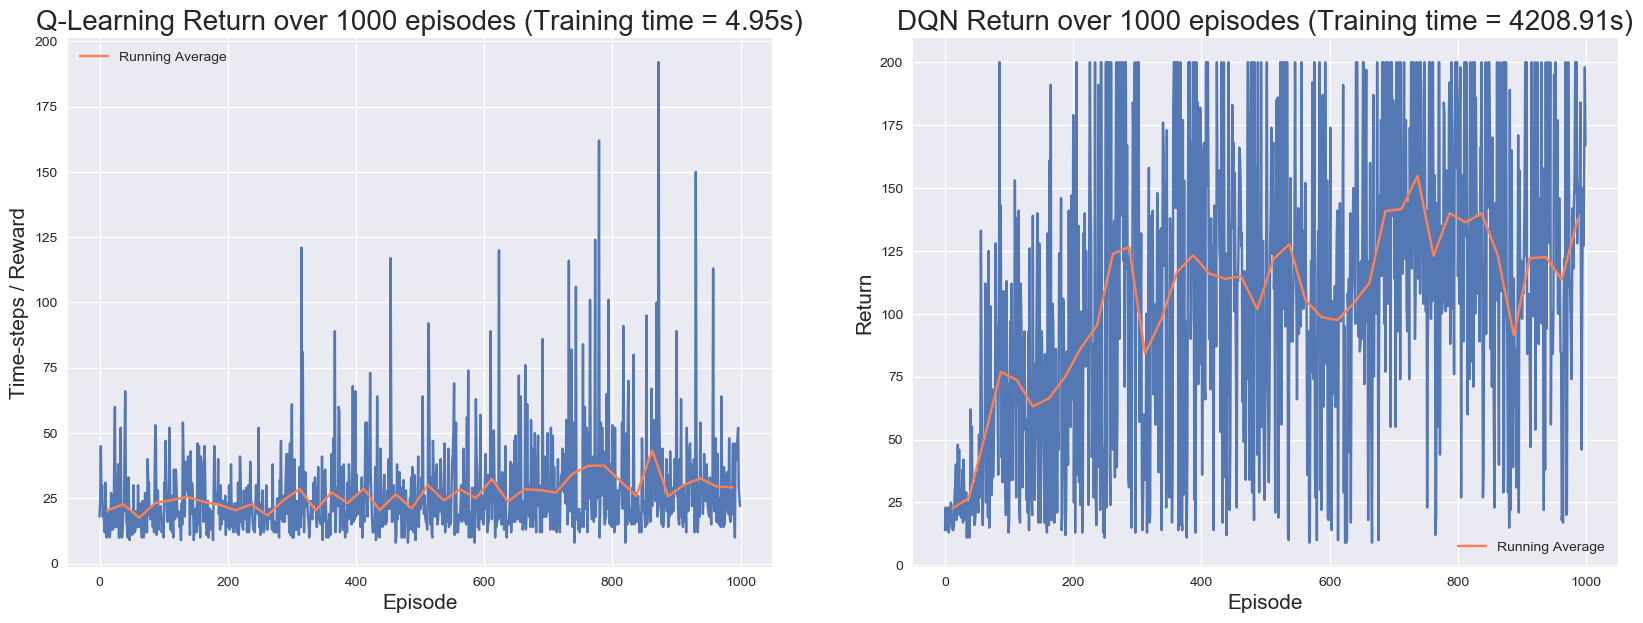

In [20]:
plt.figure(figsize=(20,7), dpi=100)
plt.subplot(1,2,1)
plt.title(f'Q-Learning Return over 1000 episodes (Training time = {round(q_learn_time,2)}s)', size=20)
plt.xlabel('Episode', size=15)
plt.ylabel('Time-steps / Reward', size=15)
plt.plot(q_learning_trainer.steps, alpha=0.95)
plt.plot(q_learn_sections, q_learn_mean_ts, color='coral', label='Running Average')
plt.legend()

plt.subplot(1,2,2)
plt.title(f'DQN Return over 1000 episodes (Training time = {round(DQN_time,2)}s)', size=20)
plt.xlabel('Episode', size=15)
plt.ylabel('Return', size=15)
plt.plot(DQN_trainer.steps, alpha=0.95)
plt.plot(DQN_sections, DQN_mean_ts, color='coral', label='Running Average')
plt.legend()